## SYRIATEL CUSTOMER CHURN ANALYSIS

#### 1. Project setup and data loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#loading the data
data_file = 'bigml.csv'
# loading the raw data from the csv file
customer_data = pd.read_csv(data_file) 

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 2. Data preparation and EDA

In [3]:
# Converting the churn column to integer
customer_data['churn'] = customer_data['churn'].replace({True: 1, False: 0})
print("The values have been converted")
customer_data.info()

The values have been converted
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total nig

C:\Users\Vicky\AppData\Local\Temp\ipykernel_18604\945671583.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_data['churn'] = customer_data['churn'].replace({True: 1, False: 0})


#### 2.1 Dropping non-predictive columns

In [4]:
# columns to be removed
dropped_columns = [
    'total day charge',
    'total eve charge',
    'phone number',
    'total night charge',
    'total intl charge'
]
# Removing the columns from the customer_data table
customer_data.drop(columns=dropped_columns, inplace=True)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  customer service calls  3333 non-null   

In [5]:

all_customers = len(customer_data)
# Counting the occurrences of each class
churn_counts = customer_data['churn'].value_counts()
# Percentage of customers who have churned
churn_percentage = (churn_counts[1] / all_customers) * 100
print(churn_counts)
print(churn_percentage)

churn
0    2850
1     483
Name: count, dtype: int64
14.491449144914492


In [6]:
from sklearn.model_selection import train_test_split

#separate features X from y
# Target coulumn is 'churn', coulumn(y)
X = customer_data.drop(columns='churn')
y = customer_data['churn']

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Columns to be changed
column_lists = ['voice mail plan', 'international plan']

X_train_final = pd.get_dummies(X_train, columns=column_lists, drop_first=True)

print(X_train_final.tail())


     state  account length  area code  number vmail messages  \
2670    WY             116        510                     12   
2165    MO             160        415                      0   
2988    VA             105        415                      0   
179     KS              70        408                      0   
2762    DC              80        408                      0   

      total day minutes  total day calls  total eve minutes  total eve calls  \
2670              221.0              108              151.0              118   
2165              171.2              103              243.5              121   
2988              259.3               96              175.2               97   
179               232.1              122              292.3              112   
2762               51.5               90              164.0               98   

      total night minutes  total night calls  total intl minutes  \
2670                179.0                 80                 9.0  

In [7]:
# Convert the new columns
convert_columns = ['international plan_yes', 'voice mail plan_yes']
# Convert the new columns from boolean to integer
X_train_final[convert_columns] = X_train_final[convert_columns].astype(int)

print(X_train_final[convert_columns].head())

      international plan_yes  voice mail plan_yes
3286                       0                    1
86                         0                    0
1349                       0                    1
1649                       0                    0
3000                       0                    0


In [8]:
# Test data
column_lists = ['international plan', 'voice mail plan']

X_test_final = pd.get_dummies(X_test, columns=column_lists, drop_first=True)
# Convert to 1/0
convert_columns = ['international plan_yes', 'voice mail plan_yes']
# convert the columns from boolean to integer
X_test_final[convert_columns] = X_test_final[convert_columns].astype(int)

print(X_train_final[convert_columns].head())

      international plan_yes  voice mail plan_yes
3286                       0                    1
86                         0                    0
1349                       0                    1
1649                       0                    0
3000                       0                    0


In [9]:
#Dropping the 'state' column from the testing and training sets
X_train_final = X_train_final.drop(columns='state')
X_test_final = X_test_final.drop(columns='state')

print("The column state has been dropped")

The column state has been dropped


In [10]:
from sklearn.preprocessing import StandardScaler
# Creating the scaler object
scaler = StandardScaler()
# Fitting the scaler on the training data
scaler.fit(X_train_final)
# Training data converted
X_train_scaled = scaler.transform(X_train_final)
# Force X_test_final columns to match the order of X_train_final
X_test_final = X_test_final[X_train_final.columns]
# Testing data coverted
X_test_scaled = scaler.transform(X_test_final)
# Convert the results back to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)



In [11]:
from sklearn.linear_model import LogisticRegression
# Creating model
baseline_model = LogisticRegression(random_state=42)
# Using the scaled training data to train the model
baseline_model.fit(X_train_scaled, y_train)
# Making predictions on the training data using the trained model
y_train_outcomes = baseline_model.predict(X_train_scaled)
# Making predictions on the testing data using the trained model
y_test_outcomes = baseline_model.predict(X_test_scaled)


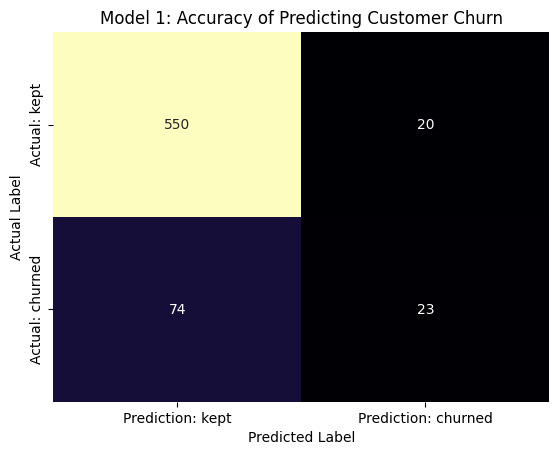

In [23]:
from sklearn.metrics import confusion_matrix
# Calculating the confusion matrix for the test data 
conf_metrics = confusion_matrix(y_test, y_test_outcomes)
# Visualization
plt.Figure(figsize=(8, 6))
sns.heatmap(conf_metrics, 
            annot=True, 
            fmt='d', 
            cmap='magma', 
            cbar=False,
            xticklabels=['Prediction: kept', 'Prediction: churned'],
            yticklabels=['Actual: kept', 'Actual: churned'],
)
plt.title('Model 1: Accuracy of Predicting Customer Churn')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()




#### The overall accuracy of the Logistic Regression model is 86%, but the model is mostly effective in non-churners. It was accurate in identifying 550 staying customers but only 23 out of 97 actual churners. This is a low recall rate, meaning that the base model does not recognize most of the at risk SyriaTel customers

#### 

In [13]:
from sklearn.metrics import classification_report
# Report
performance_summary = classification_report(
    y_true=y_test,
    y_pred=y_test_outcomes,
    target_names=['Category: Not churned(0)', 'Category: Churned(1)']
)
print(performance_summary)

                          precision    recall  f1-score   support

Category: Not churned(0)       0.88      0.96      0.92       570
    Category: Churned(1)       0.53      0.24      0.33        97

                accuracy                           0.86       667
               macro avg       0.71      0.60      0.62       667
            weighted avg       0.83      0.86      0.84       667



In [14]:
# Report 
performance_summary = classification_report(
    y_true=y_train,
    y_pred=y_train_outcomes,
    target_names=['Category: Not churned(0)', 'Category: Churned(1)']
)
print(performance_summary)

                          precision    recall  f1-score   support

Category: Not churned(0)       0.88      0.97      0.92      2280
    Category: Churned(1)       0.57      0.21      0.31       386

                accuracy                           0.86      2666
               macro avg       0.72      0.59      0.61      2666
            weighted avg       0.83      0.86      0.83      2666



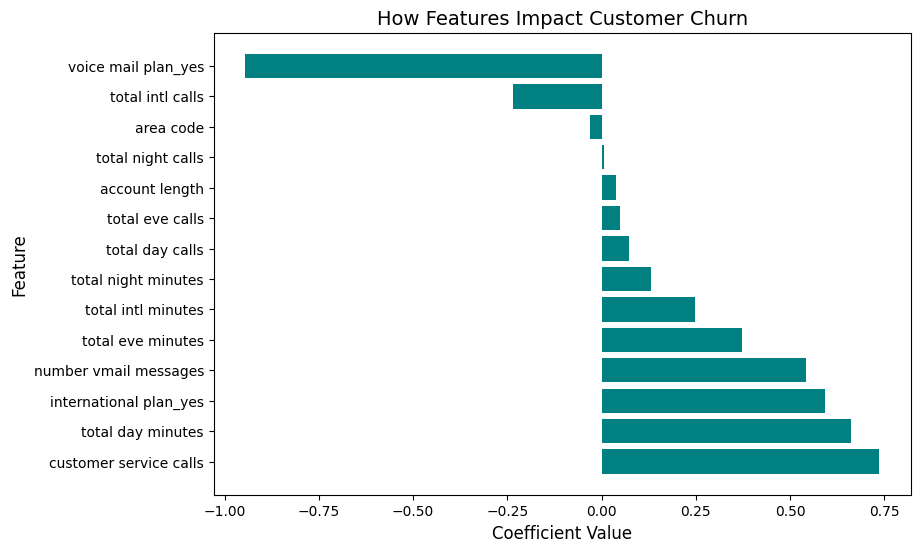

                   feature  coefficient
11  customer service calls     0.737439
3        total day minutes     0.662920
13  international plan_yes     0.594078
2    number vmail messages     0.541862
5        total eve minutes     0.373182


In [15]:
# Extraction of coefficients and feature names 
impact_values = baseline_model.coef_[0]
input_columns = X_train_final.columns
# Creating DataFrames
coef_table = pd.DataFrame({
    'feature': input_columns,
    'coefficient': impact_values, 
}
).sort_values(by='coefficient', ascending=False)
# bar plot
plt.figure(figsize=(9, 6))
plt.barh(coef_table['feature'], coef_table['coefficient'], color='teal')
plt.title('How Features Impact Customer Churn', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.savefig('Feature_importance_baseline.png')
plt.show()

print(coef_table.head(5))



#### The coeffiecient of the Logistic Regression is plotted here giving the mathematical factors that drive churn. The best positive predicators are total day minutes and customer service calls which imply that the more utilized and service interactions the more likely a customer will leave.

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Decision tree model 2
model_two = DecisionTreeClassifier(random_state=10)
# Training the model using clean, scaled training data
model_two.fit(X_train_scaled, y_train)
# Generating predictions
m2_train_pred = model_two.predict(X_train_scaled)
m2_test_pred = model_two.predict(X_test_scaled)

print({len(m2_test_pred)})

{667}


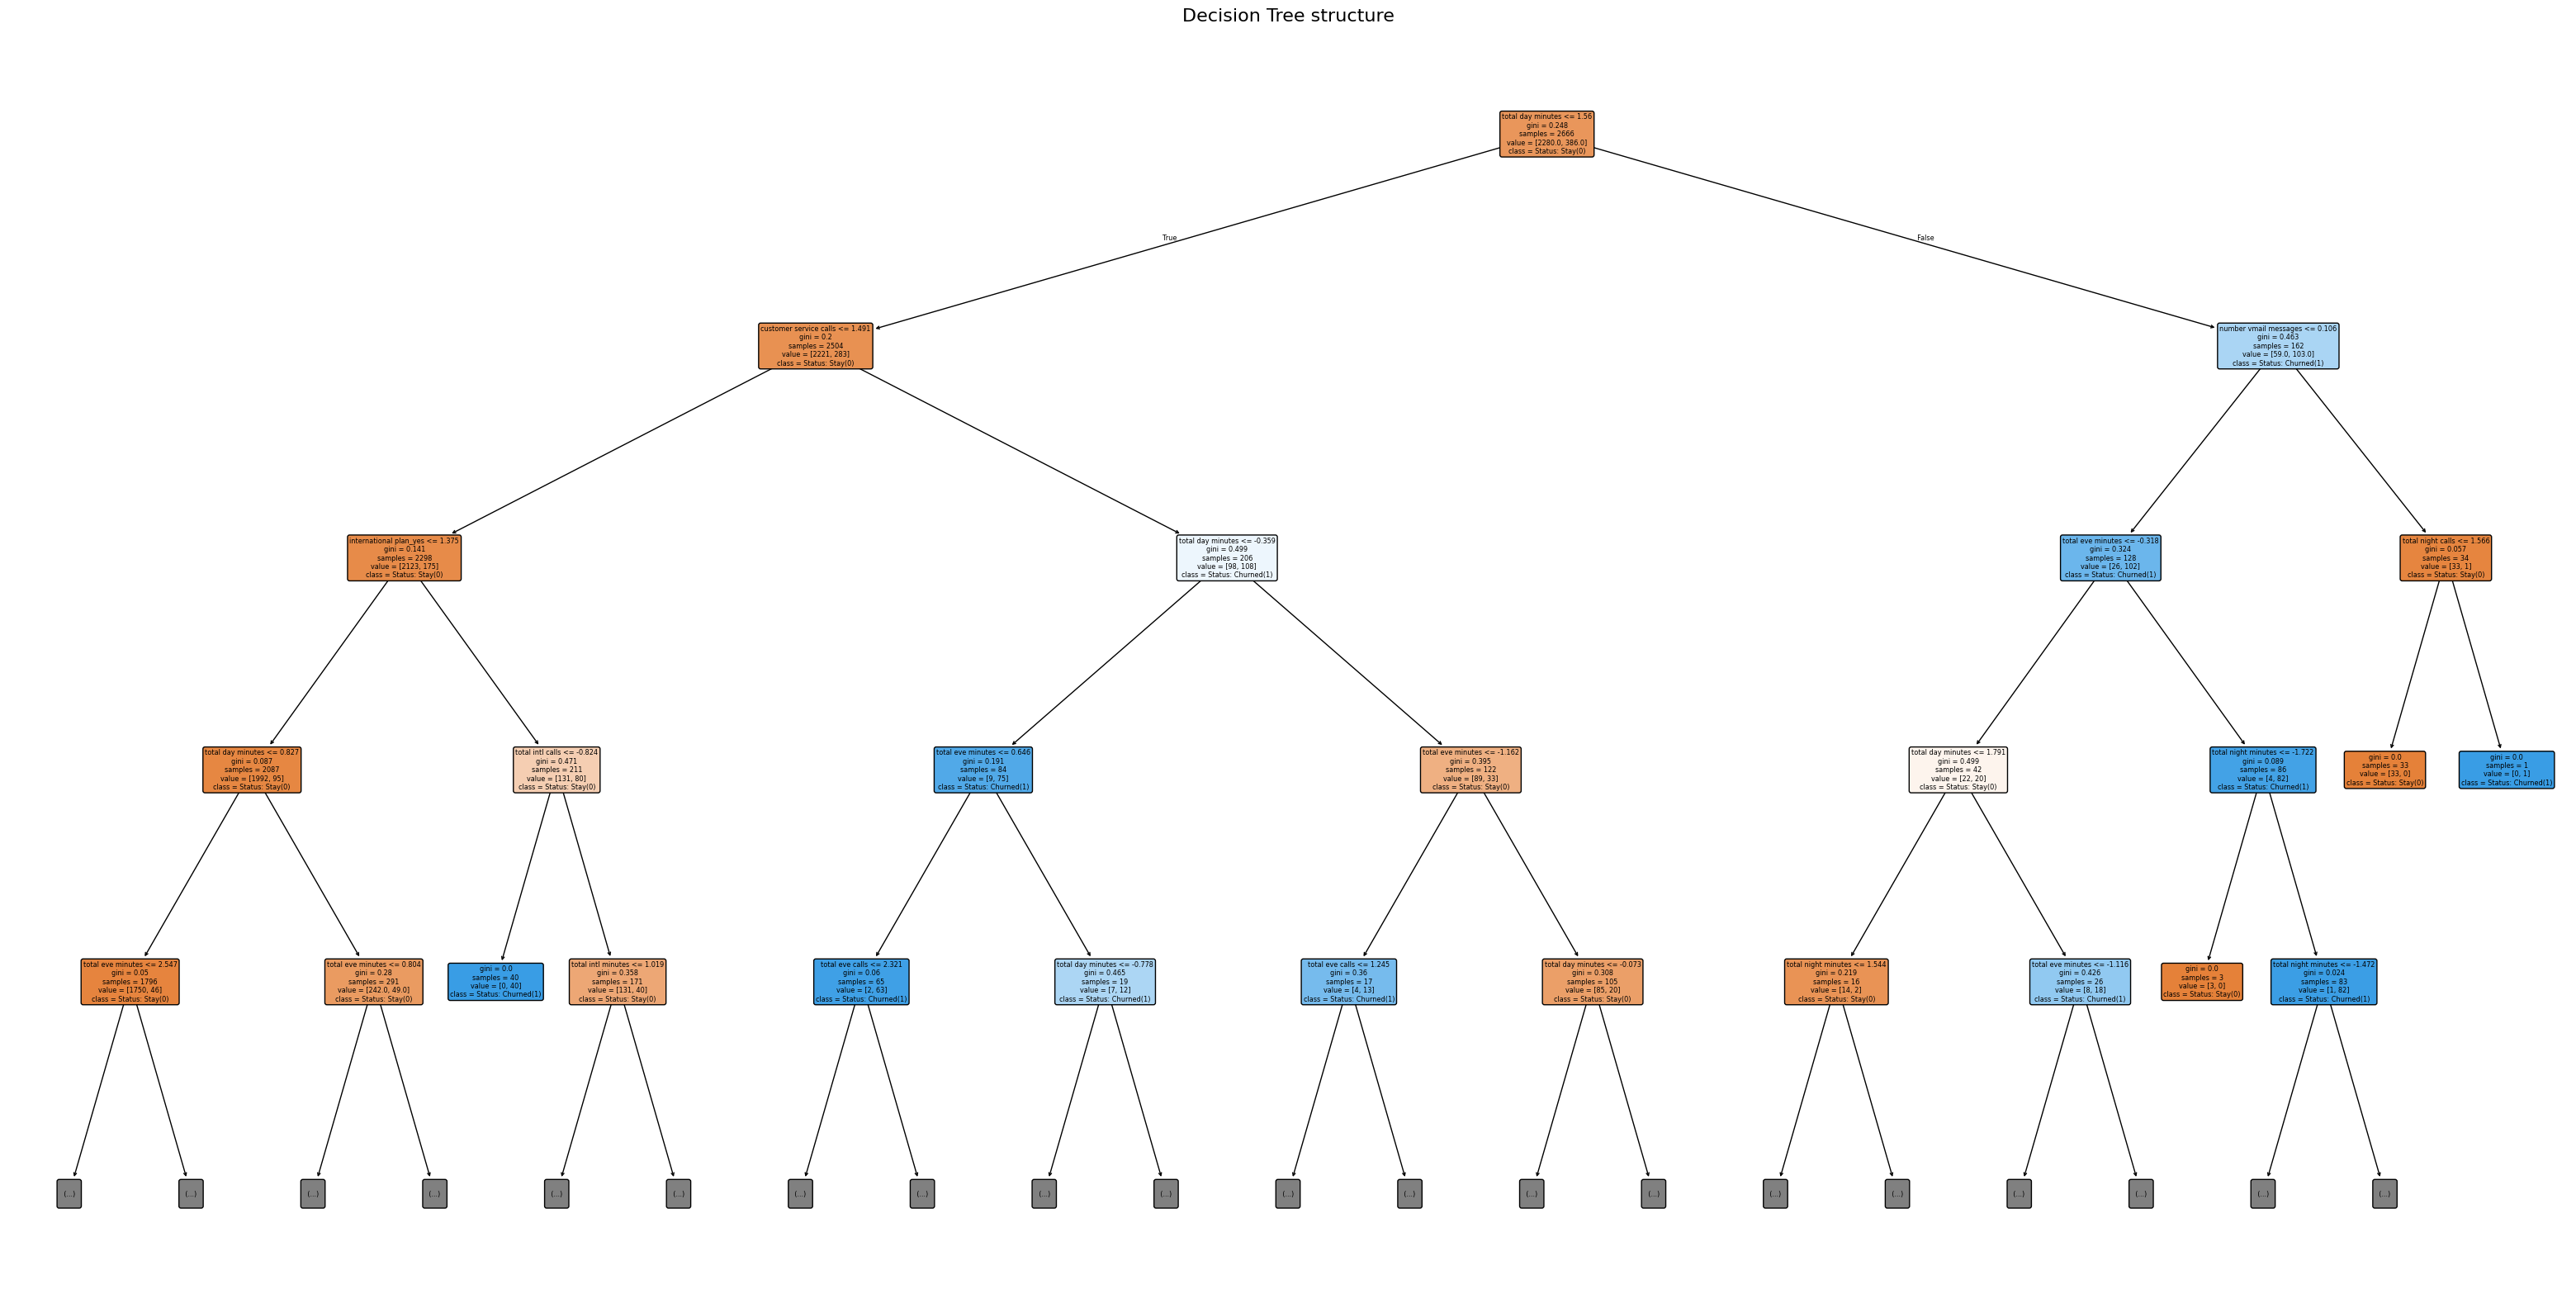

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(model_two,
            max_depth=4,
            feature_names=X_train_final.columns,
            class_names=['Status: Stay(0)', 'Status: Churned(1)'],
            filled=True,
            impurity=True,
            rounded=True)
plt.title("Decision Tree structure", fontsize=16)
plt.show()


#### It splits on definite threshold between service calls and or definite minute of use compared to linear slopes. Every bottom leaf corresponds to a terminal prediction, that is a projection of the specific trajectories of behavior (like high day usage and international plan) that cause the model to indicate a churn risk.

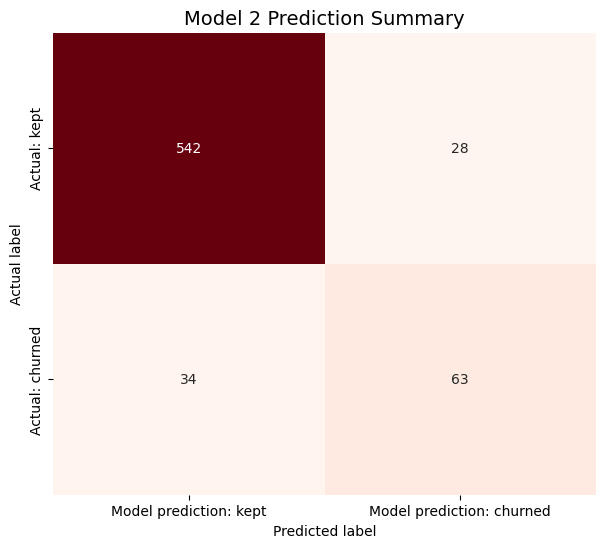

In [18]:
# Calclating confusion matrix
tree_test_performance = confusion_matrix(y_test, m2_test_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(tree_test_performance,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=False,
            xticklabels=['Model prediction: kept', 'Model prediction: churned'],
            yticklabels=['Actual: kept', 'Actual: churned'])
plt.title('Model 2 Prediction Summary', fontsize=14)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
from sklearn.metrics import classification_report

tree_test_report = classification_report(
    target_names=['Customer Kept(0)', 'Customer Lost(1)'],
    y_true=y_test,
    y_pred=m2_test_pred
)

m2_performance_summary = classification_report(
    y_true=y_train,
    y_pred=m2_train_pred,
    target_names=['Not churned', 'churned']
)

print(tree_test_report)
print(m2_performance_summary)

                  precision    recall  f1-score   support

Customer Kept(0)       0.94      0.95      0.95       570
Customer Lost(1)       0.69      0.65      0.67        97

        accuracy                           0.91       667
       macro avg       0.82      0.80      0.81       667
    weighted avg       0.90      0.91      0.91       667

              precision    recall  f1-score   support

 Not churned       1.00      1.00      1.00      2280
     churned       1.00      1.00      1.00       386

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



               Driver_Name  impact_scores
3        total day minutes       0.271762
5        total eve minutes       0.140978
11  customer service calls       0.117274
9       total intl minutes       0.100120
13  international plan_yes       0.070261
10        total intl calls       0.069857
7      total night minutes       0.057443
2    number vmail messages       0.052820
4          total day calls       0.028018
6          total eve calls       0.023704


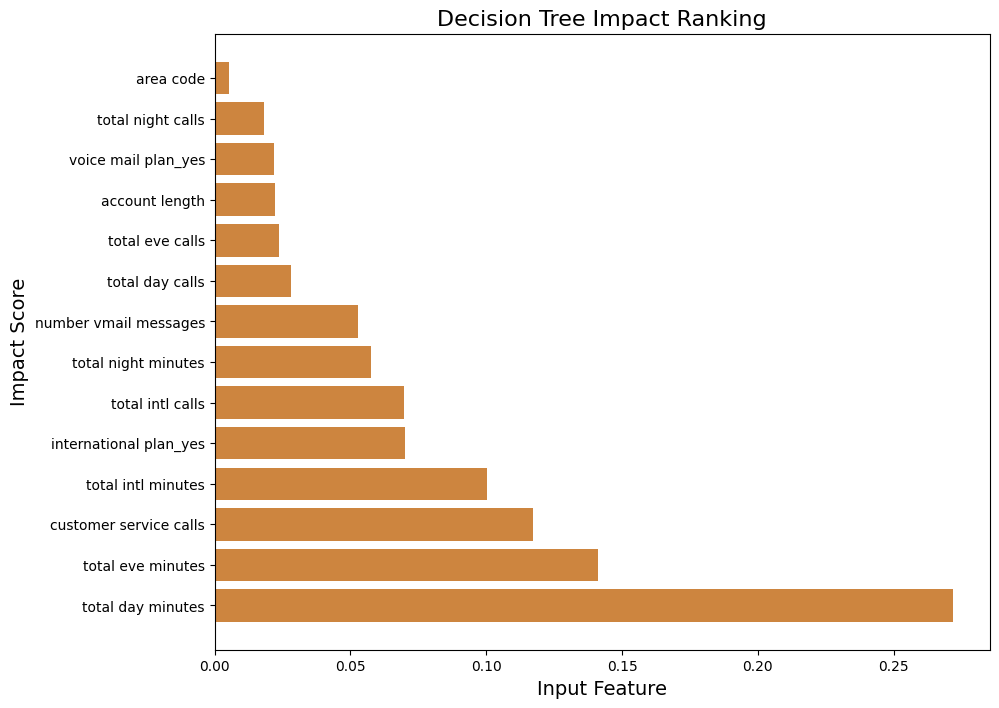

In [20]:
impact_scores = model_two.feature_importances_
input_list = X_train_final.columns

ranking_table = pd.DataFrame({
    'Driver_Name': input_list,
    'impact_scores': impact_scores
}).sort_values(by='impact_scores', ascending=False)

print(ranking_table.head(10))

plt.figure(figsize=(10, 8))
plt.barh(ranking_table['Driver_Name'], ranking_table['impact_scores'], color='peru')
plt.title('Decision Tree Impact Ranking', fontsize=16)
plt.ylabel('Impact Score', fontsize=14)
plt.xlabel('Input Feature', fontsize=14)
plt.show()


#### The ranking allows identifying what features were the most significant to the accuracy of the Decision Tree. The use of these importance scores in contrast with the regression coefficients demonstrates that the most information was received by the use of the total day minutes and customer service calls to split the data. This would give SyriaTel a summary of priority list of customer metrics, which are the most accurate predictors of future churn.

In [22]:
# Metrics for logistic regression(Model 1)
m1_test_accuracy = 0.86
m1_recall_value = 0.24
# Metrics for decision tree(Model 2)
m2_test_accuracy = 0.91
m2_recall_value = 0.65

final_ranking_set = {
    'Candidate Model': ['logistic Regression(M1)', 'Decision Tree(M2)'],
    'Overall Accuracy': [m1_test_accuracy, m2_test_accuracy],
    'Target Recall (Churn)': [m1_recall_value, m2_recall_value]
}
# Final summary table
final_summary_table = pd.DataFrame(final_ranking_set)

print(final_summary_table.sort_values(by='Target Recall (Churn)', ascending=False))

           Candidate Model  Overall Accuracy  Target Recall (Churn)
1        Decision Tree(M2)              0.91                   0.65
0  logistic Regression(M1)              0.86                   0.24


#### The summary table provides the comparison of the Logistic Regression (M1) and the Decision Tree (M2). The Decision Tree gives better accuracy of 91 as opposed to M1, which is 86%. More important is the fact that the Decision Tree has a great contribution to the Target Recall as it raises it to 0.65. This renders the Decision Tree to be the better model to use in case of SyriaTel since it captures the majority of churners which were overlooked by the baseline model.